# ***BACKGROUND STORY***
---

- **Masalah bisnis:**
  - Perusahaan e-commerce ingin mengidentifikasi pelanggan yang berpotensi berhenti menggunakan layanan (churn), agar dapat memberikan promo atau retensi strategi lebih dini.

- Tujuan analisis:
  - Mengidentifikasi fitur-fitur utama yang memengaruhi churn.
  - Membangun model prediktif untuk klasifikasi pelanggan churn.
  - Memberikan rekomendasi strategi retensi.

- STAKEHOLDER:
  - DEVISI MARKETING
  

# ***LIBRARY***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PWDK_JCDSA_1080/CAPSTONE3_DS_SYAHDAN/data_ecommerce_customer_churn.csv')

In [ ]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


# ***EDA***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [ ]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [ ]:
df.isna().sum()


,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


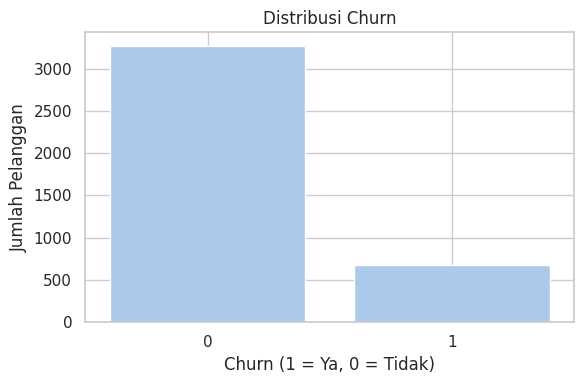

In [ ]:
# Konversi churn ke integer
df['Churn'] = df['Churn'].astype(int)

# Plot distribusi churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn')
plt.xlabel('Churn (1 = Ya, 0 = Tidak)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-31-4058088272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn',


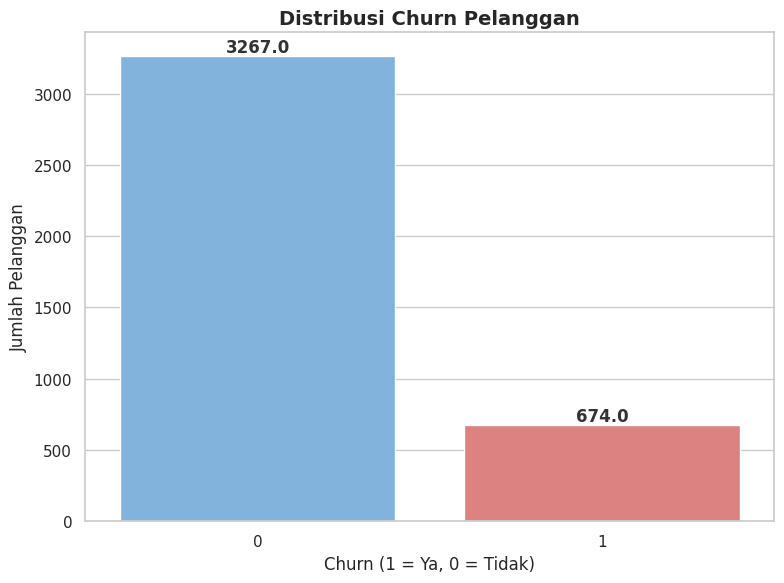

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur tema Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# Konversi churn ke integer (jika belum)
df['Churn'] = df['Churn'].astype(int)

# Buat plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Churn',
                   data=df,
                   order=[0,1],
                   palette=['#72B4EB','#EB7372'])  # contoh palet custom

# Tambahkan label jumlah di atas tiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                color='#333333')

# Customisasi axis & judul
ax.set_title('Distribusi Churn Pelanggan', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn (1 = Ya, 0 = Tidak)', fontsize=12)
ax.set_ylabel('Jumlah Pelanggan', fontsize=12)

plt.tight_layout()
plt.show()

Visualisasi di atas menunjukkan bahwa dataset cukup imbalance, mayoritas pelanggan tidak churn (label 0), dan hanya sebagian kecil pelanggan yang churn (label 1). Ini penting karena:

- Model bisa cenderung bias terhadap mayoritas class.

- Perlu perhatian pada metrik seperti recall, precision, dan F1-score saat evaluasi.

- **Korelasi Numerik dengan Churn**

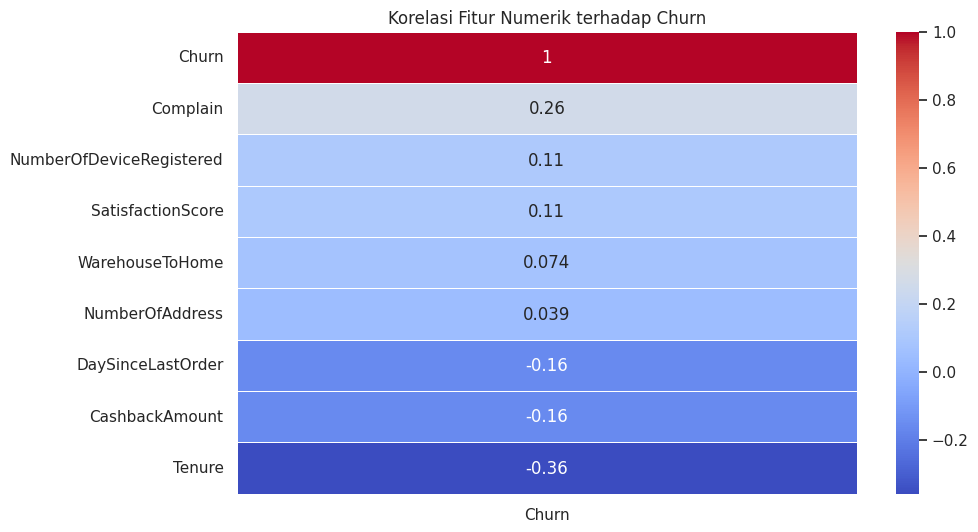

In [ ]:
df['Churn'] = df['Churn'].astype(int)

# Pilih hanya kolom numerik untuk korelasi
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Fitur Numerik terhadap Churn")
plt.show()

📈 Korelasi Positif (semakin besar nilainya → makin mungkin churn):
  - Complain: pelanggan yang pernah komplain cenderung churn.

  - DaySinceLastOrder: makin lama tidak order, makin besar kemungkinan churn.

📉 Korelasi Negatif (semakin besar nilainya → makin kecil kemungkinan churn):
  - Tenure: makin lama jadi pelanggan, makin loyal (tidak churn).
  - CashbackAmount: cashback tinggi cenderung membuat pelanggan tetap tinggal.
  - SatisfactionScore: skor kepuasan tinggi → tidak churn.

- **Distribusi Fitur Numerik**

<Axes: xlabel='Churn', ylabel='CashbackAmount'>

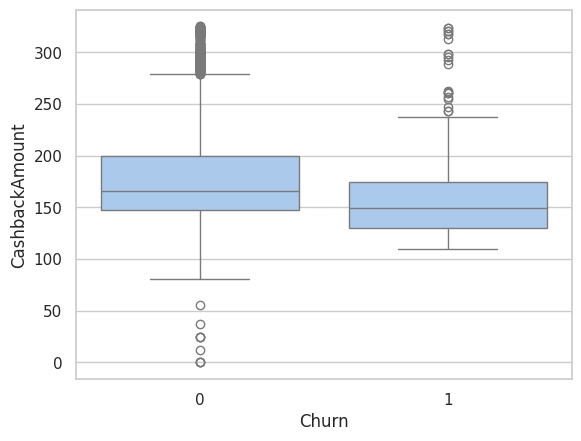

In [ ]:
sns.boxplot(x='Churn', y='CashbackAmount', data=df)

Interpretasi Visual:
- Median cashback lebih tinggi pada pelanggan yang tidak churn (label 0) dibandingkan yang churn.
- Pelanggan churn (Churn=1) cenderung memiliki cashback yang lebih rendah dan lebih sempit persebarannya.
- Ada outlier di kedua kelas, namun tidak ekstrem.

- Analisis Fitur Kategorikal

<Axes: xlabel='MaritalStatus', ylabel='count'>

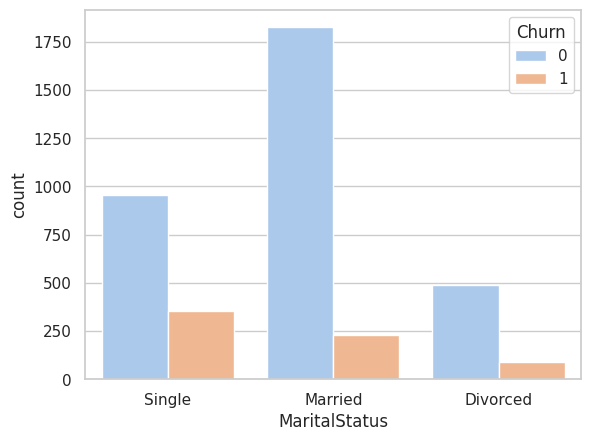

In [ ]:
sns.countplot(x='MaritalStatus', hue='Churn', data=df)

Intepretasi Visual:
- Pelanggan Married adalah yang paling banyak secara jumlah, dan cenderung tidak churn (warna biru dominan).
- Pelanggan Single memiliki jumlah churn yang lebih tinggi secara proporsi dibanding Married atau Divorced.
- Pelanggan Divorced juga memiliki rasio churn yang cukup signifikan walau jumlahnya lebih sedikit.

# ***PREPROCESSING***

In [ ]:
# Fokus hanya pada tahap preprocessing saja dalam pipeline

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Pisahkan fitur dan target
X = df.drop("Churn", axis=1)

# Identifikasi kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Pipeline numerik
numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Pipeline kategorikal
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Gabungkan ke dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

# Transformasi hasil preprocessing
X_processed = preprocessor.fit_transform(X)

# Tampilkan hasil dalam bentuk dataframe (jika feasible)
if hasattr(preprocessor.named_transformers_['cat']['encoder'], 'get_feature_names_out'):
    encoded_cat_cols = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
    processed_feature_names = list(numerical_cols) + list(encoded_cat_cols)
else:
    processed_feature_names = list(numerical_cols)

X_processed_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed,
                              columns=processed_feature_names)

X_processed_df


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20.0,25.0,4.0,3.0,7.0,0.0,3.0,230.27,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3937,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3938,30.0,6.0,5.0,3.0,3.0,1.0,2.0,156.60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3939,6.0,14.0,4.0,3.0,10.0,1.0,0.0,124.37,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Tentukan kolom numerik & kategorikal
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Tampilkan hasil
print(f"Jumlah kolom numerik   : {len(numerical_cols)}")
print(f"Jumlah kolom kategorikal: {len(categorical_cols)}")

# (Opsional) Lihat list kolomnya
print("Kolom numerik:", list(numerical_cols))
print("Kolom kategorikal:", list(categorical_cols))


Jumlah kolom numerik   : 9
Jumlah kolom kategorikal: 2
Kolom numerik: ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']
Kolom kategorikal: ['PreferedOrderCat', 'MaritalStatus']


# ***MODELLING***

In [ ]:
X_processed_df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20.0,25.0,4.0,3.0,7.0,0.0,3.0,230.27,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3937,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3938,30.0,6.0,5.0,3.0,3.0,1.0,2.0,156.60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3939,6.0,14.0,4.0,3.0,10.0,1.0,0.0,124.37,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### ***RANDOM FOREST CROSSVAL***


---
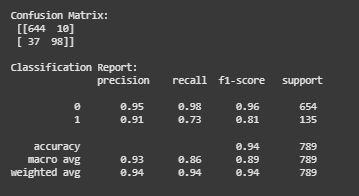


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np

X = df.drop("Churn", axis=1)
y = df["Churn"]
# Split awal: 60% train, 40% sisanya
X_temp, X_test, y_temp, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, stratify=y, random_state=42
)

# Split sisa menjadi 50% val (dari 40%) = 20% total
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

# Gabungkan train + val untuk cross-validation
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Cross-validation pada train+val set (5-fold CV)
cv_scores = cross_val_score(model, X_trainval, y_trainval, cv=5, scoring='f1')

# Latih model akhir di 60% train
model.fit(X_trainval, y_trainval)

# Evaluasi di test set
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output
print("CV F1 Scores:", cv_scores)
print("CV F1 Mean:", np.mean(cv_scores))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


CV F1 Scores: [0.76923077 0.76470588 0.7755102  0.76923077 0.7960199 ]
CV F1 Mean: 0.7749395050787249

Confusion Matrix:
 [[644  10]
 [ 37  98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       654
           1       0.91      0.73      0.81       135

    accuracy                           0.94       789
   macro avg       0.93      0.86      0.89       789
weighted avg       0.94      0.94      0.94       789



### ***RANDOM FOREST SMOTE***


---

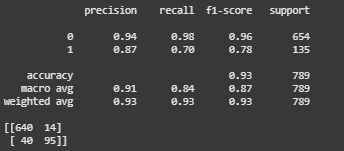

In [ ]:
# Load ulang data karena df belum tersedia
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan target
X = df.drop("Churn", axis=1)
y = df["Churn"]



# Convert to DataFrame
X_processed_df = pd.DataFrame(X_processed_df.toarray() if hasattr(X_processed_df, 'toarray') else X_processed_df,
                              columns=processed_feature_names)
# 3. Terapkan SMOTE pada hasil preprocessing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed_df, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, stratify=y, random_state=42
)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=False)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
print(conf_matrix)




              precision    recall  f1-score   support

           0       0.94      0.98      0.96       654
           1       0.87      0.70      0.78       135

    accuracy                           0.93       789
   macro avg       0.91      0.84      0.87       789
weighted avg       0.93      0.93      0.93       789

[[640  14]
 [ 40  95]]


- True Positif churn: 95 pelanggan churn berhasil dikenali
- False Negatif: 40 pelanggan churn lolos (tidak dikenali)

📌 Insight:
- Model sangat bagus mengenali pelanggan tidak churn (recall 98%)
- Model masih bisa ditingkatkan untuk mengenali churn (recall 70%)

### ***XGBOOST***


---


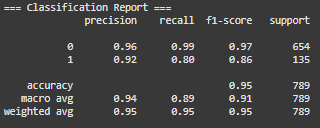



=== Confusion Matrix ===
- [645 |   9]
- [ 27 | 108]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       654
           1       0.92      0.80      0.86       135

    accuracy                           0.95       789
   macro avg       0.94      0.89      0.91       789
weighted avg       0.95      0.95      0.95       789



=== Confusion Matrix ===
[[645   9]
 [ 27 108]]


===  ROC/AUC  ===

ROC AUC: 0.956


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


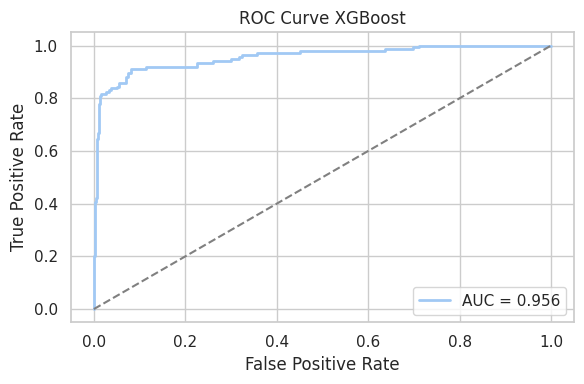



=== SHAP ===


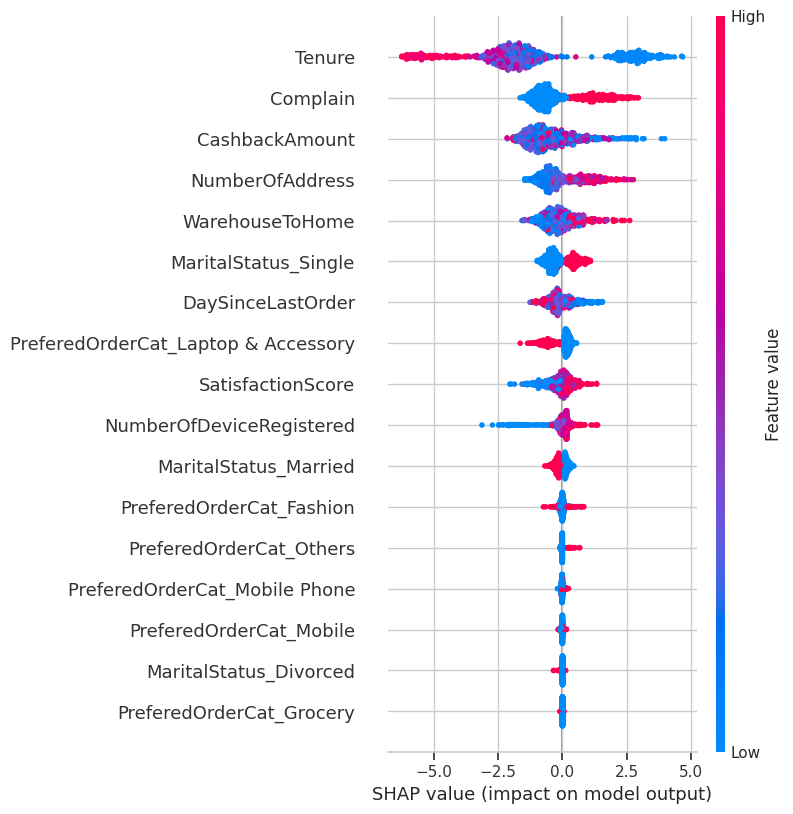

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import pickle
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Target
y = df["Churn"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Inisialisasi dan latih model XGBoost
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Prediksi & evaluasi dasar
y_pred = xgb_model.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n")
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Hitung ROC AUC
print("\n")
print("===  ROC/AUC  ===")
y_proba = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC: {roc_auc:.3f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray')
plt.title("ROC Curve XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis SHAP
print("\n")
print("=== SHAP ===")
explainer = shap.TreeExplainer(xgb_model)
X_test_df = pd.DataFrame(X_test, columns=X_processed_df.columns)
shap_values = explainer.shap_values(X_test_df)
shap.summary_plot(shap_values, X_test_df)

# Simpan model ke file
with open("xgb_model_churn.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


### ***XGBOOST CROSSVAL***


---


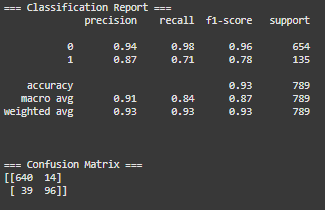

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       654
           1       0.87      0.71      0.78       135

    accuracy                           0.93       789
   macro avg       0.91      0.84      0.87       789
weighted avg       0.93      0.93      0.93       789



=== Confusion Matrix ===
[[640  14]
 [ 39  96]]


===  ROC/AUC  ===
ROC AUC: 0.942


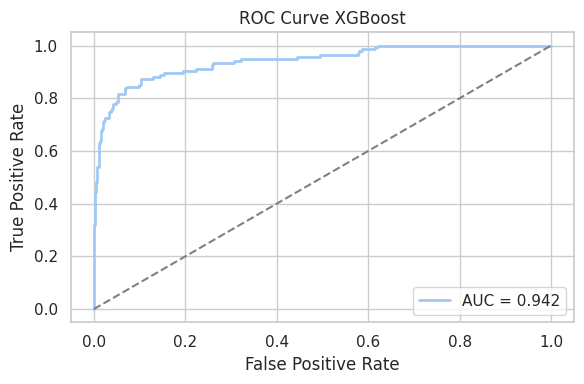



=== SHAP ===


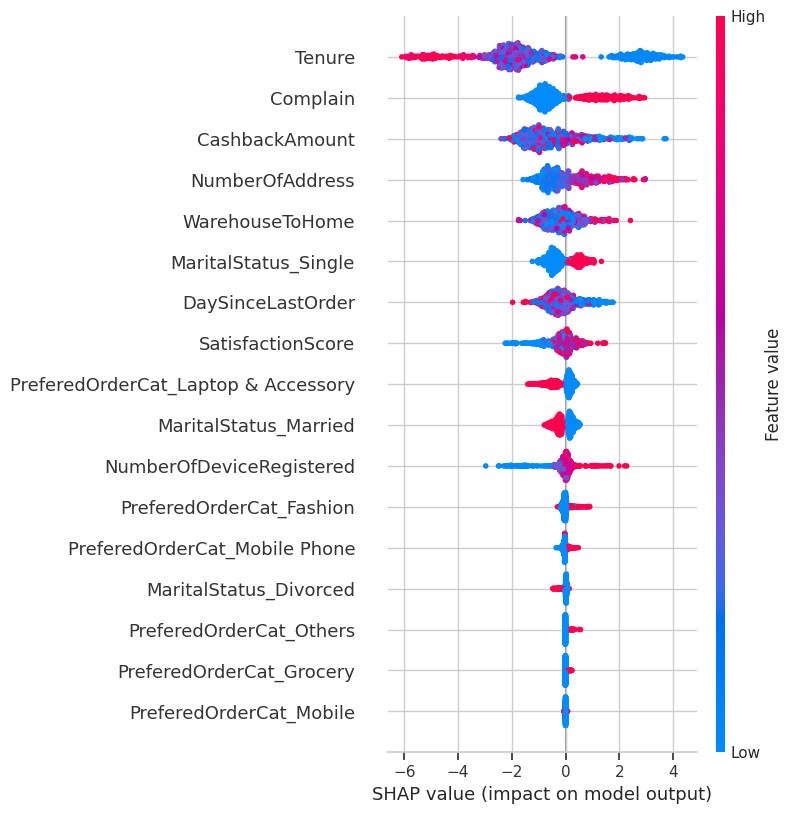

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import pickle
import shap

# Target
y = df["Churn"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, stratify=y, random_state=42
)

# Split sisa menjadi 50% val (dari 40%) = 20% total
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)


# Inisialisasi dan training model XGBoost
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Prediksi kelas dan probabilitas
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

X_train
y_test

# Evaluasi performa
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n")
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Hitung dan tampilkan ROC AUC
print("\n")
print("===  ROC/AUC  ===")
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray')
plt.title("ROC Curve XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# SHAP analysis
print("\n")
print("=== SHAP ===")
explainer = shap.TreeExplainer(xgb_model)
X_test_df = pd.DataFrame(X_test, columns=X_processed_df.columns)
shap_values = explainer.shap_values(X_test_df)
shap.summary_plot(shap_values, X_test_df)

# Simpan model ke file pickle
with open("xgb_CRSVAL_model_churn.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


### ***XGBOOST WITH SMOTE***



---

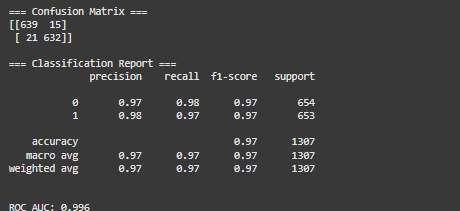

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Confusion Matrix ===
[[639  15]
 [ 21 632]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       654
           1       0.98      0.97      0.97       653

    accuracy                           0.97      1307
   macro avg       0.97      0.97      0.97      1307
weighted avg       0.97      0.97      0.97      1307


ROC AUC: 0.996


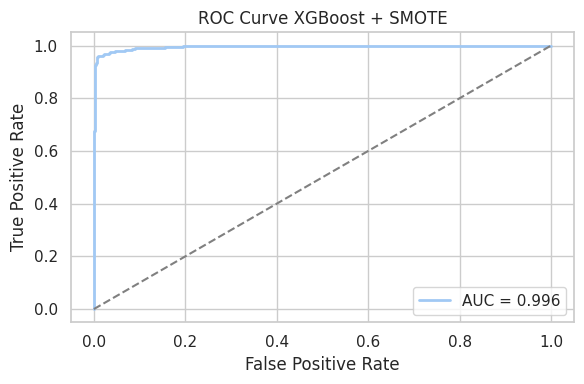


=== SHAP Summary ===


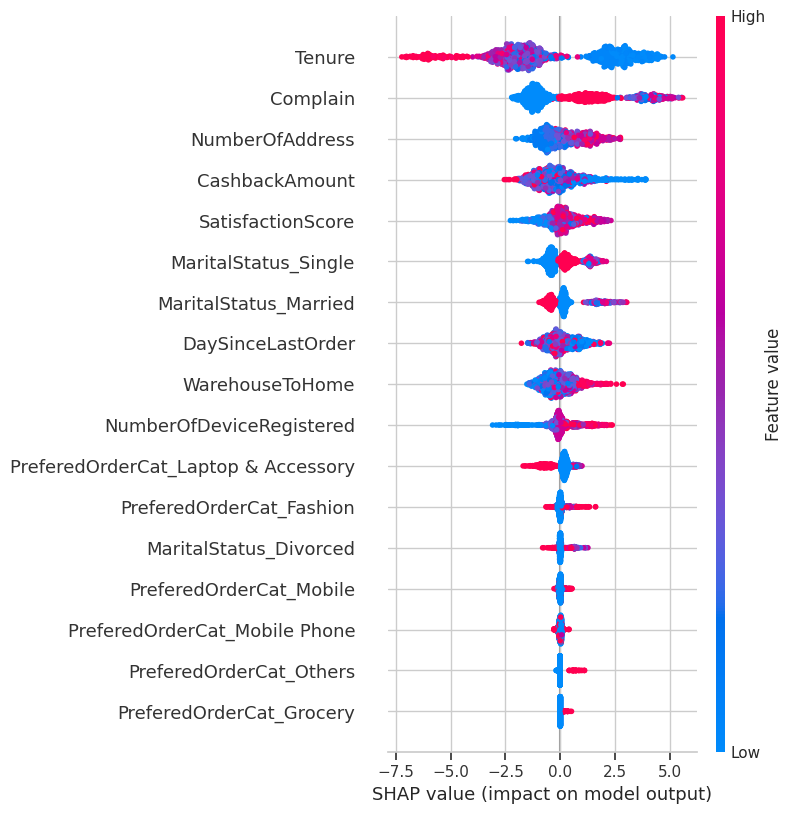

In [ ]:
# 1. Import library SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
# 2. Tentukan target
y = df["Churn"]


# 4. Split data hasil resampling
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 3. Terapkan SMOTE pada hasil preprocessing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed_df, y)


# 5. Latih model XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# 6. Evaluasi model
print("\n=== Confusion Matrix ===")
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 7. Hitung dan tampilkan ROC AUC
y_proba = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC: {roc_auc:.3f}")

# 8. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray')
plt.title("ROC Curve XGBoost + SMOTE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. SHAP analysis
print("\n=== SHAP Summary ===")
explainer = shap.TreeExplainer(xgb_model)
X_test_df = pd.DataFrame(X_test, columns=X_processed_df.columns)
shap_values = explainer.shap_values(X_test_df)
shap.summary_plot(shap_values, X_test_df)